In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn import linear_model
from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
boston = load_boston()
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.columns = [x.lower() for x in df.columns]
df["medv"] = boston.target

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
X = df[[x for x in df.columns if x != 'medv']]
y = df['medv']

In [7]:
X_ = sm.add_constant(X)
model = sm.OLS(y, X_)
results = model.fit()

In [9]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 02 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        07:05:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [10]:
results.fittedvalues
results.resid

0      -6.003843
1      -3.425562
2       4.132403
3       4.792964
4       8.256476
         ...    
501    -1.133341
502    -1.775719
503    -3.727426
504    -4.127967
505   -10.444212
Length: 506, dtype: float64

In [11]:
# sklearn linear regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [12]:
print("Intercept: {}".format(regr.intercept_))
print("Coefficients: {}".format(regr.coef_))

Intercept: 36.45948838509015
Coefficients: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [14]:
predictions = regr.predict(X)

In [16]:
residuals = y - predictions
rss = sum(np.power(residuals, 2))
tss = sum(np.power(y - np.mean(y), 2))
r2 = 1 - (rss/tss)

print('R2: {}'.format(r2))

R2: 0.7406426641094093


<AxesSubplot:xlabel='lstat', ylabel='medv'>

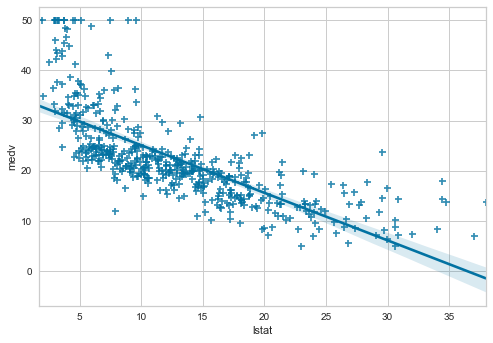

In [17]:
sns.regplot(x = df['lstat'], y = df['medv'], marker="+")

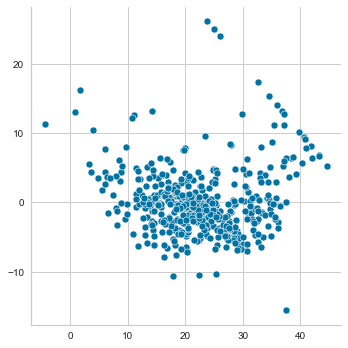

In [18]:
sns.relplot(x = results.fittedvalues, y = results.resid)

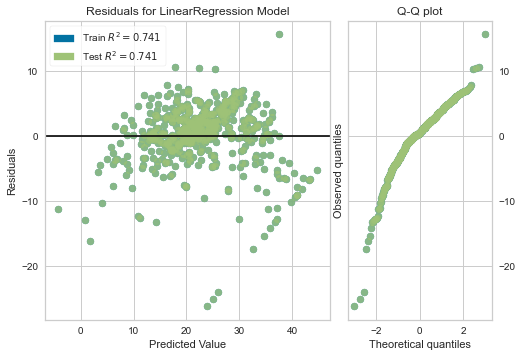

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [19]:
visualizer = ResidualsPlot(regr, hist=False, qqplot=True)
visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [21]:
pd.Series([variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])], index=X_.columns)

const      585.265238
crim         1.792192
zn           2.298758
indus        3.991596
chas         1.073995
nox          4.393720
rm           1.933744
age          3.100826
dis          3.955945
rad          7.484496
tax          9.008554
ptratio      1.799084
b            1.348521
lstat        2.941491
dtype: float64